In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
df = pd.read_excel(r'C:\Users\matth\Documents\Excel EIA Energy\New folder (2)\retail sales residential energy US 2018.xlsx')

In [34]:
#https://www.eia.gov/electricity/data.php By state and utility, Residential, Excel File, table 6

In [3]:
df.rename(columns={'Unnamed: 1':'State',
'Unnamed: 2':'Ownership',
'Unnamed: 3':'Customers (Count)',
'Unnamed: 4':'Sales (Megawatthours)',
'Unnamed: 5':'Revenues (Thousands Dollars)',
'Unnamed: 6':'Average Price (cents/kWh)'},inplace=True)

In [5]:
df.drop([0],axis=0,inplace=True)
df.drop([1],axis=0,inplace=True)
df.set_index('2018 Utility Bundled Retail Sales- Residential',inplace=True)

In [6]:
df.drop(['Adjustment 2018'],axis=0,inplace=True)
df = df[~df['Ownership'].isin(['Behind the Meter'])]
df = df[~(df['Average Price (cents/kWh)'] > 40)]

In [8]:
df.head(-5)

,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh)
2018 Utility Bundled Retail Sales- Residential,,,,,,
Alaska Electric Light&Power Co,AK,Investor Owned,14707,148071,19063,12.8742
Alaska Power and Telephone Co,AK,Investor Owned,5569,25790,8090,31.3687
Anchorage Municipal Light and Power,AK,Municipal,24548,120098,24180.9,20.1343
"Barrow Utils & Elec Coop, Inc",AK,Cooperative,1529,11121,1543,13.8747
Chugach Electric Assn Inc,AK,Cooperative,71615,479353,93972.8,19.6041
...,...,...,...,...,...,...
Garland Light & Power Company,WY,Cooperative,1918,21399,3285,15.3512
High Plains Power Inc,WY,Cooperative,12081,141988,19756.3,13.9141
"High West Energy, Inc",WY,Cooperative,4913,57551,8286,14.3977


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2011 entries, Alaska Electric Light&Power Co to Yampa Valley Electric Assn Inc
Data columns (total 6 columns):
State                           2011 non-null object
Ownership                       2011 non-null object
Customers (Count)               2011 non-null object
Sales (Megawatthours)           2011 non-null object
Revenues (Thousands Dollars)    2011 non-null object
Average Price (cents/kWh)       2011 non-null object
dtypes: object(6)
memory usage: 110.0+ KB


In [10]:
df.describe()

,State,Ownership,Customers (Count),Sales (Megawatthours),Revenues (Thousands Dollars),Average Price (cents/kWh)
count,2011,2011,2011,2011,2011.0,2011.000000
unique,51,7,1941,2005,1987.0,2011.000000
top,TX,Cooperative,13,58262,1980.0,15.753303
freq,159,853,3,2,2.0,1.000000


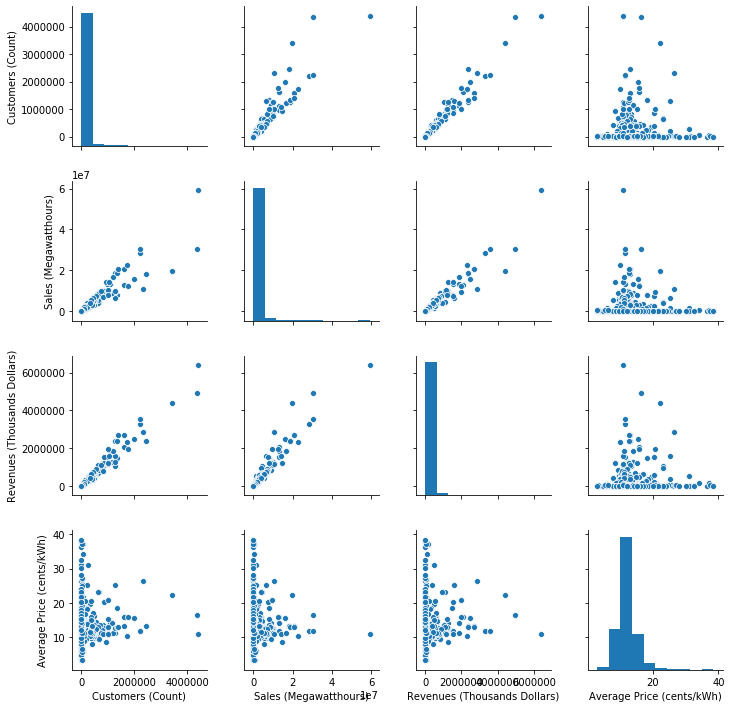

In [11]:
sns.pairplot(df)

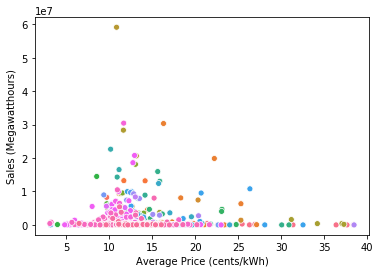

In [13]:
sns.scatterplot(x='Average Price (cents/kWh)',y='Sales (Megawatthours)',data=df,hue='State',legend=False)

<Figure size 864x432 with 0 Axes>

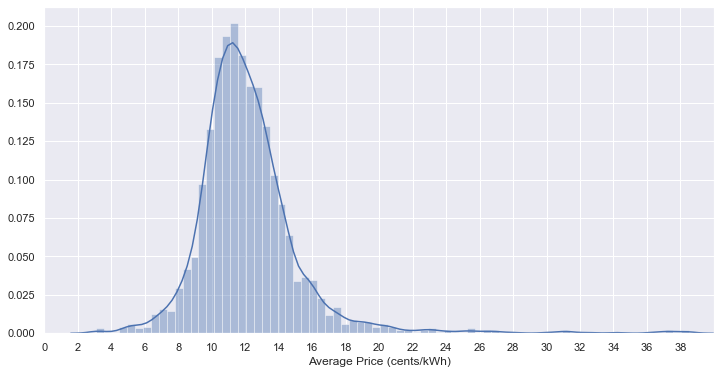

In [14]:
sns.set()
xtick = np.arange(0,40,2)
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(df['Average Price (cents/kWh)'], ax=ax,bins=75)
ax.set_xlim(0,40)
ax.set_xticks(xtick)
plt.show()

In [15]:
X = df[['Customers (Count)', 'Sales (Megawatthours)','Revenues (Thousands Dollars)']]
y = df[['Average Price (cents/kWh)']]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.40,random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(lm.intercept_)

[12.11453911]


In [22]:
lm.coef_

array([[-6.72486557e-06, -1.47250956e-06,  1.65054554e-05]])

In [23]:
cdf = pd.DataFrame([-6.72486557e-06, -1.47250956e-06,  1.65054554e-05],X.columns,
                            columns=['Coeff'])
cdf

,Coeff
Customers (Count),-0.000007
Sales (Megawatthours),-0.000001
Revenues (Thousands Dollars),0.000017


In [24]:
predictions = lm.predict(X_test)

In [25]:
predictions

array([[12.07372223],
       [12.11021406],
       [12.12917538],
       [12.10812101],
       [12.11483132],
       [12.10458088],
       [12.12902553],
       [11.8989783 ],
       [12.1251664 ],
       [12.10960578],
       [12.19063523],
       [12.11275252],
       [12.2091519 ],
       [12.10775479],
       [12.1258614 ],
       [12.09552214],
       [12.10989515],
       [12.08896183],
       [12.06108864],
       [12.10806219],
       [12.14396236],
       [12.11331726],
       [12.11504694],
       [12.12957863],
       [12.1243553 ],
       [12.12198573],
       [12.13705322],
       [12.1014372 ],
       [12.08569135],
       [12.10705896],
       [12.15757717],
       [12.0082308 ],
       [12.10648114],
       [11.65007689],
       [12.11174597],
       [12.24105207],
       [12.19549301],
       [12.17883338],
       [12.11146914],
       [12.11380683],
       [12.11500643],
       [12.11003899],
       [12.12939016],
       [12.01635798],
       [11.59590256],
       [12

In [26]:
y_test

,Average Price (cents/kWh)
2018 Utility Bundled Retail Sales- Residential,
"Lake Region Electric Coop, Inc - (OK)",10.9715
City of Laurinburg - (NC),11.7577
City of Newberry - (SC),14.5488
City of Rocky Mount - (NC),11.9329
"Columbus Electric Coop, Inc",16.7437
...,...
"Farmers Electric Coop, Inc - (NM)",11.5551
"Butler Rural El Coop Assn, Inc - (KS)",14.3302
Sam Houston Electric Coop Inc,11.8789


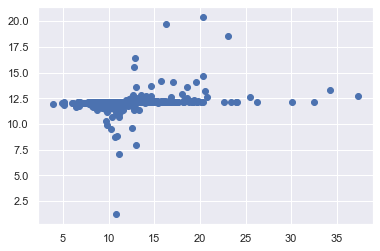

In [27]:
plt.scatter(y_test,predictions)

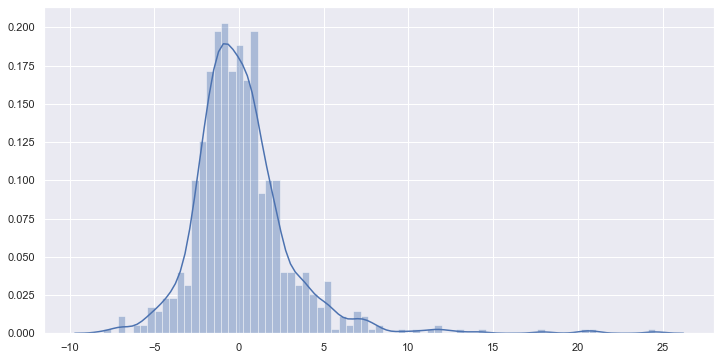

In [29]:
sns.set()
plt.figure(figsize=(12,6))
sns.distplot((y_test-predictions),bins=75)

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,predictions)

1.9846610401740237

In [32]:
metrics.mean_squared_error(y_test,predictions)

9.060907261631149

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.010134093629576